# Python

## Python基础
* 对于空字典，可以直接使用dicts["key_dont_have"]=value
* set 和 list可以相互转换 b=list(a) a=set(b)
* extends面对的是list加一段list,可以a.extends([])
* append 面对的是list加一个元素 
* python中的数据类型可分为6类：其中不可变类型为number、string、tuple，可变类型为：list、dict、set
    1. Number(数字)  （bool布尔类型、int整型、float浮点型、complex复数等都归为Number数字类型）
    2. String(字符串) 
    3. Tuple (元组) 
    4. List(列表)
    5. Dictionary (字典)
        * defualtdict避免出现key error
    6. Sets(集合) 




In [4]:
'''Counter使用方法'''
import numpy as np
from collections import Counter
x_array = np.random.random_integers(1,10,100)
counter = Counter(x_array)
print(counter)

Counter({10: 14, 3: 12, 4: 11, 9: 11, 6: 11, 8: 9, 2: 9, 5: 9, 1: 8, 7: 6})


<ipython-input-4-5aab6c07566f>:4: DeprecationWarning: This function is deprecated. Please call randint(1, 10 + 1) instead
  x_array = np.random.random_integers(1,10,100)


In [1]:
for i,j in zip(range(0,3),range(3,0,-1)):
    print(i,j)

0 3
1 2
2 1


In [1]:
# enumerate取字典元素并拆包

from collections import defaultdict
import numpy as np

exampledict={1:"a",2:"b",3:"c"}
examplelist=[10,20,30,40]
for key,val in enumerate(examplelist):
    print(str(key)+":"+str(val))
print([1,2,3]+[3,46])

dict_baby=defaultdict(int)
dict_baby["hello"]=dict_baby["hello"]+1
print(dict_baby["NotExist"])
print(dict_baby)
dict_baby1=defaultdict(list)
testlist1=[1,2,3]
dict_baby1["littleTest"].append(testlist1)
print(dict_baby1)

testChen=[1,1,1,1,2,2,2,2,2,3,4,5]
testChen.insert(0,6)
print(testChen)


strtest="1,1,2,3,4,#,6,"
nums_str=strtest.split(",")
print(nums_str)

xtent=[10,11,12,13,14,15,16,17]
testMap=list(map(int,xtent))
print(testMap.index(11))

tnt=[None for i in range(10)]
print(tnt)
npx=np.full((3,3),np.inf)
npy=np.inf
print(np.isnan(npy))


0:10
1:20
2:30
3:40
[1, 2, 3, 3, 46]
0
defaultdict(<class 'int'>, {'hello': 1, 'NotExist': 0})
defaultdict(<class 'list'>, {'littleTest': [[1, 2, 3]]})
[6, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 4, 5]
['1', '1', '2', '3', '4', '#', '6', '']
1
[None, None, None, None, None, None, None, None, None, None]
False


In [17]:
# 迭代器
from collections import Iterable
from collections import Iterator
isinstance([11,12,13],Iterable)  #查看是否为其中的例子
'''自己创建一个类，实现可迭代对象'''
class ClassMate(object):
    def __init__(self):
        self.names=list()
    def add(self,name):
        self.names.append(name)
    def __iter__(self):#让classmate可以迭代
        return ClassIterator(self)#返回一个迭代器对象
class ClassIterator(object):
    def __init__(self,obj):
        self.obj=obj
        self.current_num=0
    def __iter__(self):
        pass
    def __next__(self):
        if self.current_num<len(self.obj.names):
            ret=self.obj.names[self.current_num]
            self.current_num+=1
            return ret
        else:
            print("迭代完毕")
            raise StopIteration
    
classmate=ClassMate()
classmate.add("刘旭")
classmate.add("杨澳")
classmate.add("李钰科")
for i in classmate:print(i)

class Student(object):
    def __init__(self):
        self.names=list()
        self.current_num=0
    def add(self,name):
        self.names.append(name)
    def __next__(self):
        if self.current_num<len(self.names):
            ret=self.names[self.current_num]
            self.current_num+=1
            return ret
        else:
            raise StopIteration
    def __iter__(self):
        return self
students=Student()
students.add("陈庄")
students.add("金鱼")
students.add("李白")
for student in students:print(student)
print("迭代完毕")


print(range(19))

#for循环可以接收可迭代对象，同时list、tuple也可以接收

刘旭
杨澳
李钰科
迭代完毕
陈庄
金鱼
李白
迭代完毕
range(0, 19)


NameError: name 'xrange' is not defined

* 用yield完成多任务
    * 协程比线程消耗的更少 [yield](../../CS/Python/yeild%E5%AE%8C%E6%88%90%E5%A4%9A%E4%BB%BB%E5%8A%A1.py)
    * 当下可以使用  greenle和gevent完成多任务

In [24]:
'''生成器'''
nums=(x*2 for x in range(10)) #这个反应的是生成数据的方式，占用空间比较少

#使用生成器完成斐波那契数列,生成器其实就是一个特殊的迭代器
'''如果一个函数中有yeild语句，那么这就不是函数，而是一个生成器的模版'''
def create_num(all_num):
    a,b=0,1
    current_num=0
    while current_num<all_num:
        yield a #会暂停并且返回a的值
        a,b=b,a+b
        current_num+=1
#如果出现了yield 那么不是调用函数，而是创建一个生成器的对象
obj=create_num(10)
#send可以传参进去，可以在传任何中间参数
for num in obj:print(num)
f=create_num(10)#获得一个生成器
ret=next(f)
print(ret)
ret=f.send(None)
print(ret)


0
1
1
2
3
5
8
13
21
34
0
1


In [20]:
#如何重写key并且按照需求的值排序，升序降序
lists=[ 
["a",True,2],["t",True,2],["c",False,3],
["d",True,4],["e",False,7],["f",True,7]
]
print(lists)
#先去掉所有list[1]=False的产品
#再对lists排序，先以其数值12345排序，如果数值相同的话，再按照dcba的字母降序排序
for i,listx in enumerate(lists):
    if not listx[1]:lists.pop(i)

#先排序次要属性
lists=sorted(lists,reverse=True,key=lambda x:x[0])
print(lists)
#再按照主要属性
lists=sorted(lists,reverse=False,key=lambda x:x[2])
print(lists)


lists=[ 
["a",True,2],["t",True,2],["c",False,3],
["d",True,4],["e",False,7],["f",True,7]
]

lists=sorted(lists,key=lambda x: (x[2],-ord(x[0])))
print(lists)

import heapq
nums=[(2,(1,2)),(1,(4,5)),(18,(6,7))]
heapq.heapify(nums)
heapq.heappush(nums,(6,(14,15)))
print(heapq.heappop(nums))
print(heapq.heappop(nums))
print(heapq.heappop(nums))
print(heapq.heappop(nums))
queue=[]
heapq.heapify(queue)
(x,(y,z))=(1,(2,3))
print(x,y,z)

[['a', True, 2], ['t', True, 2], ['c', False, 3], ['d', True, 4], ['e', False, 7], ['f', True, 7]]
[['t', True, 2], ['f', True, 7], ['d', True, 4], ['a', True, 2]]
[['t', True, 2], ['a', True, 2], ['d', True, 4], ['f', True, 7]]
[['t', True, 2], ['a', True, 2], ['c', False, 3], ['d', True, 4], ['f', True, 7], ['e', False, 7]]
(1, (4, 5))
(2, (1, 2))
(6, (14, 15))
(18, (6, 7))
1 2 3


## 网络编程

* ifconfig xxx(机器名字) up/down 关网卡
    * ip地址有区域划分
    * 目前ipv4地址值已经瓜分完毕，255.255.255.255
        * A类用于 (8)(24主机号)
        * B类(16)(16)
        * C类 (24)(8)
        * D类 (1110)(xxx)多播
        * E类 1111(xxx)保留地址
    * ipv6截至2022年8月8日，我国IPv6互联网活跃用户数达6.93亿，移动网络IPv6流量占比突破40%
* port端口号 告诉我们数据通信给哪个进程
    * 传递数据和接受数据需要 四元组（source_ip,source_port,dest_ip,dest_port)
    * 端口号(0~65535(2的16次方))
    * 0~1023是知名端口
    * 端口号有分配标准，80端口HTTP 21端口FTP
* UDP模型
    * 不安全 快 丢一点数据没关系
    * socket套接字
        * s=s.socket.socket(socket.AF_INET,socket.SOCK_DGRAM)  #创建UDP的套接字
            * s.close()
        * 全双工(既可以收也可以发)
        * 端口可能冲突
        * [一个简单的UDP通信文件](Zhuang_UDP_1.py)
        * [简易UDP聊天器](UDP_smallChat.py)
        * 如果收信息，就需要设置防护/处理机制 防止对方的洪水攻击(占用端口号，不停地发送很大的数据)
            * 客户端:socket()->sendto()->resvfrom()->close()
            * 服务器:socket()->bind()->receive()->sendto()
* TCP通信模型
    * 稳定 安全 但是传输相对慢 
    * 流程：建立连接=>传送数据=>关闭连接
    * 应答机制
    * 超时重传
    * 错误校验
    * Congestion Control
        * 避免发送方发的太快，接收方来不及完全收下
    * [TCP客户端](TCP%E5%AE%A2%E6%88%B7%E7%AB%AF.py)
    * [TCP服务器](TCP%E6%9C%8D%E5%8A%A1%E5%99%A8.py)
    * [文件客户端](%E6%96%87%E4%BB%B6%E4%B8%8B%E8%BD%BD%E5%AE%A2%E6%88%B7%E7%AB%AF.py)
    * [文件服务器](%E6%96%87%E4%BB%B6%E4%B8%8B%E8%BD%BD%E5%AE%A2%E6%88%B7%E7%AB%AF.py)

* TCP 
    * tcp面向连接
    * tcp服务器需要绑定，方便客户端找到
    * tcp客户端一般不绑定，主动链接服务器，只需要确定服务器的ip和port信息，本地客户端可以随意
    * tcp服务器，首先会使用一个端口来接收客户端的链接，接下来会产生一个新的client_socket用于标记这个客户端，并且单独为这个服务
    * 关闭listen后意味着被动套接字被关闭，不能找到新的客户端的链接请求。但是之前的客户端仍然是正常通信
    * 客户端如果关闭与tcp的链接，那么服务端的recv会解除堵塞，并且收到的请求为空，判断客户端已经下线
    

* HTTP协议简介
    * 浏览器->服务器发送的请求格式
        * 超文本传输协议，基于TCP
        * 浏览器与服务器之间的传输
        * GET /  : 斜杠之后的所有东西表示我需求什么 
        * Host: 127.0.0.1:8080
        * Connection: keep-alive长链接
        * Accept: text/html, application/xhtml+xml(可以接受的数据方式)
        * User-Agent:反爬虫，看浏览器的代理，如果不是正常的格式则不会返回数据
    * 服务器应答
        * Header / Body / 
        * HTTP1.1 200 OK
        * Set-Cookie:浏览器获得一个缓存,设定变量名，每次只要一访问远程服务器的域名，就会返回这个缓存,根据cookie追踪用户
        * response中的换行符应该使用"\r\n"，并且使用空行来区分header和body

* socket.setblocking(False) 设置套接字为非堵塞的方式，永远都是非堵塞。即如果此时操作try产生了异常，就会进行try里的操作，否则就往下走不管这个try。
    * 为了实现网络的多任务，使用了进程、线程、单线程单进程并发、协程

![](../../CS/Python/mini_frame_web/%E4%B8%89%E6%AC%A1%E6%8F%A1%E6%89%8B.png)
![](../../CS/Python/mini_frame_web/%E5%9B%9B%E6%AC%A1%E6%8C%A5%E6%89%8B.png)


* 协议其实就是确定的规则，让浏览器和网络之间传输满足关系
    * header是告诉浏览器需要怎么解析文件
        * 分为 request header/request body(如果用户有数据需要提交的话，就需要使用这个)
* 长链接和短链接
    * 短链接：（三次握手+数据传输+四次挥手)*n
    * 长链接： 三次握手+数据传输*n+四次挥手(一般使用同一个套接字) 
![111](../../CS/Python/mini_frame_web/1.PNG)

* epoll
    * 目前的方案，不用多进程多线程，使用epoll完成单线程、单进程完成多任务
    * nginx、redis使用的就是epoll()
    * 有一个特殊的内存，在这个内存是应用程序和操作系统共存的，所有到来的套接字不选择轮询方法而是事件通知的方法
    * 时间复杂度是O(1)
    

### TCP-IP 协议
* tcp-ip是一类协议,而不是分隔开的
* TCP/IP四层：应用层+运输层+网络层+网络接口层
* OSI:应用层+表示层+会话层+传输层+网络层+数据链路层
* 全为1的为广播地址，也就是xx.xx.xx.255/Ethernet指的是链路层的mac地址
*   传输层：TCP UDP   / TCP 8080和UDP8080可以同时使用
*  互联网包括了上百种协议标准，其中最重要的是TCP和IP协议，所以简称为TCP/IP协议族
*  发送方增包，接收方解包
* mac其实就是网卡的序列号

![](../../CS/Python/mini_frame_web/TCP%3AIP%E5%8D%8F%E8%AE%AE%E6%97%8F.PNG)
![](../../CS/Python/mini_frame_web/%E5%90%84%E5%B1%82%E5%8D%8F%E8%AE%AE.PNG)


### 网络通信
* 两台电脑的网络
    * 1100 0000(192) 1010 1000(168) 
    * 网络号= ip(0,255不能用) & 网络掩码
* 网络掩码
    * 子网掩码
* hub集线器 ： 坏处：全部通过广播发送文件，现在一般不用hub
* 交换机： 好处：广播+单播(需要包括mac地址) => 通过arp广播得到192.168.1.2对应的mac地址,先发送的目的mac地址设置为FF:FF:FF:FF:FF:FF，这样就可以获取所需的目的路由器的mac地址然后再返回
* 使用路由器连接多个网络
    * 路由器的作用：链接2个及以上的网络，进行通信
    * 交换机是可以让一群机器进行通信
    * 如果source-ip和dest-ip不属于同一个网络的时候，通过默认网关转发，网卡转发
    * 在传递过程，ip地址不变，mac地址在不断变化(mac地址在通信过程只是为了匹配收发)
![](../../CS/Python/mini_frame_web/%E8%B7%AF%E7%94%B1%E5%99%A8.PNG)

### 浏览器访问网站的过程
* step1 域名 解析为 ip地址  
    * DNS服务器用于转化域名为ip
* step2 向服务器发送TCP的3次握手
* step3 发送HTTP请求数据以及服务器应答
* step4 tcp的四次挥手

In [2]:
import copy
list1=[1,2,3,4,5]
a=list1
list2=[6,7,8,9]
list1+=list2
print(id(list1))
print(id(a))
a="str"
c=a
b="str"
dict_tmp={a:3}
dict_tmp[c]


140468354653568
140468354653568


3

### 高级数据结构
#### 平衡二叉树balanced binary tree(AVL)
*   AVL的平衡因子 = 左子树的深度 - 右子树的深度

#### 红黑树
* 节点不是红色就是黑色
* 根节点是黑色
* 叶子结点是黑色
![红黑树例图](../../CS/Python/%E7%BA%A2%E9%BB%91%E6%A0%91.png)
* 每个红色结点的两个子结点都是黑色。（从每个叶子到根的所有路径上不能有两个连续的红色结点）
* 从任一结点到其每个叶子的所有路径都包含相同数目的黑色结点

红黑树的特别与效率
* 查找、搜索、插入 O(logN)
* 查找 约等于 avl
* 插入优秀于avl(n)


### 网络爬虫
[使用yeild图片下载器](../../CS/Python/gevent%E7%9B%B8%E5%85%B3.py)<br>

####    `正则表达式`

* [wWhH] 在[]中都可以选择一个进行匹配
* \d 代表一个数字

In [46]:
'''网络爬虫'''
import re
result = re.match(r"[hH]ello","hello world")    #re.match(正则表达式，匹配的字符串)
#如果result有返回值
# 上一步匹配到数据的话，可以使用group方法来提取数据
result.group()

tmpL=[None]
tmpL.pop()
print(tmpL)

#匹配一个数字\d     \D匹配非数字
result = re.match(r"速度与激情\d\d","速度与激情103")
result.group()
#匹配一个范围
print(re.match(r"速度与激情[1-7a-d6-9]","速度与激情5").group()) #只匹配1-7、a-d、6-9 因为[]只匹配一个字符
#匹配单词字符\w      \W匹配非单词字符
print(re.match(r"速度与激情\w","速度与激情哈").group())
#匹配所有字符 .(除了换行符都可以匹配)
print(re.match(r"速度与激情.","速度与激情@").group())
#匹配规定个数的字符
print(re.match(r"速度与激情\d{1,3}","速度与激情197").group()) #匹配\d数字{1,3}告诉我们是1位到3位
#匹配前一个字符出现1次或者0次
print(re.match(r"\d{3,4}-?\d{7,8}","028-86157946").group())
print(re.match(r"\d{3,4}-?\d{7,8}","0571-8615794").group())
print(re.match(r"\d{3,4}-?\d{7,8}","02886157946").group())

html_contenct="""fdsf
ksadknan
ksdnlndlnaldn\d
klsandlnlk{%c}
klndsalnl
klsndlan
"""
#匹配前一个字符出现0次或者无数次 *
print(re.match(r".*","").group())
#匹配前一个字符出现一次或者n次 +
print(re.match(r"k+","kk2").group())
#eg:判断变量名是否符合规则
names=["name1","2name","__name_","Main"]
for name in names:
    #名字以nN_开头，后面随意多少个字符
    ret=re.match(r"[a-zA-Z_]+[\w]*",name)
    if ret is None:print("非法命名"+name)
    else:
        print("符合规范"+name)
        print(ret.group())


#匹配判断以谁开头和结尾 ^表示匹配开头，$表示匹配结尾
print(re.match(r"^[a-zA-Z0-9_]{4,20}@163\.com$","_scu_chenzhuang@163.com").group())#匹配163邮箱
'''如果需要在正则中使用一些特殊字符，可以使用\进行转义'''
#通过()分组，group取其中一些部分
print(re.match(r"([a-zA-Z_]{4,20})@(126|163)(\.com)","scu_chenzhuang@126.com").group(2))
#通过\1 \2前后分组对称判断
print(re.match(r"<(\w*)><(\w*)>.*</\2></\1>","<h1><body>sddalfkhl21</body></h1>").group())


[]
速度与激情5
速度与激情哈
速度与激情@
速度与激情197
028-86157946
0571-8615794
02886157946

kk
符合规范name1
name1
非法命名2name
符合规范__name_
__name_
符合规范Main
Main
_scu_chenzhuang@163.com
126
<h1><body>sddalfkhl21</body></h1>


In [83]:
'''Python中的高级用法'''
import re
#search不需要从头开始匹配，只要能找到则会返回成功
print(re.search(r"\d+","点赞数6999，评论数100").group())
#找到所有的有关性元素 findall
#sub可以进行替换，中间进行替。并且支持根据现在的数字字符串，使用函数
print(re.sub(r"你+","她","我是你你你你你爹啊,你爸爸"))
def adder(temp):
    strNum=temp.group()
    cur=(int)(strNum)+1
    return str(cur)
print(re.sub(r"\d+",adder,"我现在有99个儿子"))
#split 切割
job_des='''<div>
        <p>岗位职责：</p>
<p>完成推荐算法、数据统计、接口、后台等服务器端相关工作</p>
<p><br></p>
<p>必备要求：</p>
<p>良好的自我驱动力和职业素养，工作积极主动、结果导向</p>
<p>&nbsp;<br></p>
<p>技术要求：</p>
<p>1、一年以上 Python 开发经验，掌握面向对象分析和设计，了解设计模式</p>
<p>2、掌握HTTP协议，熟悉MVC、MVVM等概念以及相关WEB开发框架</p>
<p>3、掌握关系数据库开发设计，掌握 SQL，熟练使用 MySQL/PostgreSQL 中的一种<br></p>
<p>4、掌握NoSQL、MQ，熟练使用对应技术解决方案</p>
<p>5、熟悉 Javascript/CSS/HTML5，JQuery、React、Vue.js</p>
<p>&nbsp;<br></p>
<p>加分项：</p>
<p>大数据，数理统计，机器学习，sklearn，高性能，大并发。</p>

        </div>'''
print(re.sub(r"<[^>]*>|&nbsp;", "", job_des)) # [^>]表示匹配在[]中所有 非> 的字符,此处匹配到字符以后将其换成空字符串

#Python 贪婪和非贪婪
'''在"*","?","+","{m,n}"后面加上？，使贪婪变成非贪婪。'''
s="This is a number 234-235-22-423"
print(re.match(r".+(\d+-\d+-\d+-\d+)",s).group(1))
print(re.match(r".+?(\d+-\d+-\d+-\d+)",s).group(1))

#非贪婪使用
html_str='''<img data-original="https://rpic.douyucdn.cn/appCovers/2016/11/13/1213973_201611131917_small.jpg" src="https://rpic.douyucdn.cn/appCovers/2016/11/13/1213973_201611131917_small.jpg" style="display: inline;">'''
print(re.search(r"https://.*?\.jpg",html_str).group())




6999
我是她爹啊,她爸爸
我现在有100个儿子

        岗位职责：
完成推荐算法、数据统计、接口、后台等服务器端相关工作

必备要求：
良好的自我驱动力和职业素养，工作积极主动、结果导向

技术要求：
1、一年以上 Python 开发经验，掌握面向对象分析和设计，了解设计模式
2、掌握HTTP协议，熟悉MVC、MVVM等概念以及相关WEB开发框架
3、掌握关系数据库开发设计，掌握 SQL，熟练使用 MySQL/PostgreSQL 中的一种
4、掌握NoSQL、MQ，熟练使用对应技术解决方案
5、熟悉 Javascript/CSS/HTML5，JQuery、React、Vue.js

加分项：
大数据，数理统计，机器学习，sklearn，高性能，大并发。

        
4-235-22-423
234-235-22-423
https://rpic.douyucdn.cn/appCovers/2016/11/13/1213973_201611131917_small.jpg
\


'\\'

In [30]:
#r表示原生字符串
import re
path="/home/"
a=path.split("/")
print(a)
mm="c:\\a\\b\\c"
print(mm)
print(r"c:\\a\\b\\c")
mm
#re.match(r"c:\\a",mm).group()
with open ("../DataBase/数据库笔记.ipynb","w",encoding="utf-8") as fp:
    print("打开了")

#
s = "(ed(et(oc))el)"
#print(re.sub(r'\(([^()]*)\)', lambda x:x.group(1)[::-1], s))
#print(re.sub(r'\(([^()]*)\)', "", s)) 
#注意此处 \(  和 \) 是为了识别（和)  [^]在括号里的^表示取反，表示取[^()]括号之外的字符*个无数个
# 这里的含义是匹配 (....) 的格式，并且括号内不能有括号 注意到 (([^()]))  最外层的括号实际上是说，将这个元素标记为group并且有一定数
print(re.sub(r"\(([^()]*)\)","这里被替换了",s))

'''某道leetcode题 请你按照从括号内到外的顺序，逐层反转每对匹配括号中的字符串，并返回最终的结果'''
# 输入：s = "(ed(et(oc))el)"
# 输出："leetcode"
# 解释：先反转子字符串 "oc" ，接着反转 "etco" ，然后反转整个字符串。
while '(' in s:
    s = re.sub(r"\(([^()]*)\)",lambda x: x.group(1)[::-1], s)
print(s)



['', 'home', '']
c:\a\b\c
c:\\a\\b\\c
打开了
(ed(et这里被替换了)el)
leetcode


## 多任务 
* 多任务 
    * 单核CPU执行多任务=>实际上多任务交替执行
        * 时间片轮转，每个进程分配一定的时间段
        * 优先级调度
* 并行/并发
    * 并行：核数量>任务数量 多任务同时进行
    * 并发 调度算法

* 线程
    * 优先级相同的情况下，线程没有先后顺序，所有子线程/主线程都在抢执行顺序
    * 仅当thread1.start()时才会创建线程，同时执行线程
    * 多线程共享全局变量,此时会出现问题，可能造成多个线程同时取到一个元素，同时对这个变量进行修改，可能造成我取到a的现在的值的这一刻，a被线程3修改成了100这样的情况
        * 此时需要引入同步/异步处理/互斥锁
    * 多线程传参是按照元组传参，如果是一个参数，那么传递方法应该是(a,)
    * [双线程处理UDP，可接收也可发送](../../CS/Python/udp%E8%81%8A%E5%A4%A9%E5%99%A8%E6%95%B4%E4%BD%93%E6%8E%A7%E5%88%B6.py)
* 锁
    * 死锁 : 都取决于对方，咬着资源不放开
        * 避免死锁
            * 银行家算法
            * 添加超时时间
    * 锁 
        * [一道标准化的顺序打印题目,锁](../../ComputerScience/1114.%E6%8C%89%E5%BA%8F%E6%89%93%E5%8D%B0.py)
        *   Thread.Lock()
            * acquire()表示上锁
            * release()表示释放

* 进程
    * 运行的程序
    * 进程拥有资源，可以调用键盘、屏幕....
    * 新建->就绪->执行->等待->死亡
        * 多线程和多进程的区别，进程：只有父子进程的引用的文件都灭亡以后才会关闭,即父亲死了，如果子还在运行，那还会运行
        * 而多线程中是不断交替运行，如果socket提前关闭了，那么整个线程都会关闭
    * [进程1题目](../../CS/Python/%E8%BF%9B%E7%A8%8B1.py)
    * 子进程优先共享，次才拷贝。写时拷贝
    * 进程池
        * 进程池如果产生异常，不会产生异常信息
        *  先设定一个容器设置一个size,然后超过size的进程会被置为等待状态
        * 先进的先运行
        * close()用于停止进程池的请求
        * 重复利用进程，pid不会变
        * 先po.close() 再po.join()，保证进程池运行完后再关闭
    * 回调函数
        *即callback 通知主进程我的任务完成了->让主进程处理自己的结果->阻塞的任务放入进程池子->主进程执行回调函数的时候就省去了I/O过程->直接拿到的就是任务结果
    * 进程间通信方法:信号(报警系统，产生中断,通知到每个cpu、网卡，去执行最重要的东西)，`共享内存`(开辟一片空间，让所有进程都可以访问)+信号量(类似于锁)，信号量，消息队列模型(类似于有个池子的queue)，管道模型(需要手动加锁的队列),socket
* 复制文件夹：创建文件夹=>把文件夹写过来->
* python中有协程，更加方便gevent

* 线程 vs 协程 vs 进程
    * 多进程耗费的资源最多
    * 进程是资源分配的单位，操作系统调度的是线程
    * 协程利用线程在执行某个操作的情况时，可以继续执行其他任务，效率比较高

#### 其他特性
* GIL
    * while True:pass 此处的pass实际上每时每刻都会执行此程序，会陷入自程序的死循环
    * 多进程多线程，真正能实现并行的是多进程。而多线程是假并行。
    * GIL全局解释器锁，类似于mutex
        * cpython 用c写的python解释器 C语言做的解释器，所以会有GIL的东西存在
        * java 用jpython解释器
        

## 算法相关 <br>
[一道数组相关的表面积题目](../../ComputerScience/892.三维形体的表面积.py)<br><br>
[处理三数/四数之和，这类问题的思路都是第一步先将其中两个数按照顺序确定，比如在前列的位置，接下来根绝双指针确定cd，需要注意的是三数之和/四数之和的前提都是数组需要排列好。同尾双指针的做法都是先要确定好顺序](../../ComputerScience/18.%E5%9B%9B%E6%95%B0%E4%B9%8B%E5%92%8C.py)


|   哪一类问题   |  `算法`/数据结构   |    链接    |
| :-------:|:----------:|:------------:|
|   下一个更大的数       |    `单调栈`        |   [1.下一个更大数](../../ComputerScience/496.%E4%B8%8B%E4%B8%80%E4%B8%AA%E6%9B%B4%E5%A4%A7%E5%85%83%E7%B4%A0-i.py)<br><br>[2.接雨水](../../ComputerScience/42.%E6%8E%A5%E9%9B%A8%E6%B0%B4.py)           |
|   循环链表解决dp或者单调栈   |  `延长`将数组延长一倍或1个，变循环为单链   |   [详情可以看leetcode](../../ComputerScience/503.%E4%B8%8B%E4%B8%80%E4%B8%AA%E6%9B%B4%E5%A4%A7%E5%85%83%E7%B4%A0-ii.py)    |
|   回文串相关   |  贪心子问题   |    [去掉一个字符后变成回文](../../ComputerScience/680.%E9%AA%8C%E8%AF%81%E5%9B%9E%E6%96%87%E4%B8%B2-ii.py)    |
|   回溯算法如何去重   |  对于去重，数列里的数字每个只能用一次，那么：首先用排序法，其次是对于每层的遍历，if nums[i]==nums[i-1]:continue  这句话的例子对于,[7,1,1,1,1]，在某一层的循环，如果取了nums[1]了，那么nums[2~4]不会再取，会在下一层再取1   |    LeetCode40    |
|   N皇后问题   |  回溯，困难。注意1.可以用[[1 for i in range(3)] for j in range(3)]这样建立多维数组 2.return True来告诉其余值，相关的回溯已经计算完毕   |    [解数独](../../ComputerScience/37.%E8%A7%A3%E6%95%B0%E7%8B%AC.py)    |
|   回溯解决括号   |   使用积分来计算括号增减，即左括号入加，右括号入就减，最后dfs  |    [删除无效的括号](../../ComputerScience/301.%E5%88%A0%E9%99%A4%E6%97%A0%E6%95%88%E7%9A%84%E6%8B%AC%E5%8F%B7.py)   |
|   快慢指针   |  链表最快的相遇公共点，让长表先走一段，最后长表和短表一起走，它们在公共部分相等   |   [链表相遇](https://leetcode.cn/problems/liang-ge-lian-biao-de-di-yi-ge-gong-gong-jie-dian-lcof/)   |
|   如何建造类   |  在实际工程中通过hashmap建多叉树，注意遍历顺序   |    [王位继承](../../ComputerScience/1600.%E7%8E%8B%E4%BD%8D%E7%BB%A7%E6%89%BF%E9%A1%BA%E5%BA%8F.py)   |
|   如何通过双向链表组成LFU   |  LFU 最近最不常使用的缓存机制，每次缓存满的时候，先丢访问次数最少的，再丢最近最没有使用的。基本方法：keyValuemap用于查找key-value,freq-map用于存储访问次数对应的map。同时建造一个双向链表方便，插入和删除(会变成O(l)的时间)   |    [很难的LFU](https://leetcode.cn/problems/lfu-cache/)    |
|   递归求二叉搜索树的下一个值，例如[2,1,3] 求2的下一个值即为3   |  递归计算，如果此时值<=target,那么答案应该在自己的右子树，否则就需要递归自己的左子树。如果root>target,看自己的左子树有没有答案，没有就代表自己为答案   |    [递归求二叉搜索树相关](https://leetcode.cn/problems/successor-lcci/)    |
|   前序+中序造出二叉树   |  1.二叉搜索树排序后是中序遍历 2.前序+中序可以做出二叉树 3.通过list(maps(int,nums))建造出idnex和list之间的关系，在计算的时候可以获取其index   |    [中序+前序造二叉树](../../ComputerScience/449.%E5%BA%8F%E5%88%97%E5%8C%96%E5%92%8C%E5%8F%8D%E5%BA%8F%E5%88%97%E5%8C%96%E4%BA%8C%E5%8F%89%E6%90%9C%E7%B4%A2%E6%A0%91.py)    |
|   二叉搜索树删除节点所需要关注的   |   分情况讨论1.不存在此点 2.存在此点 a.叶子结点 直接删除 b.有一个孩子不为空，将非空孩子为新节点 。如果有左右孩子，那么把右孩子的最左边的孩子移动到现在的root,把对应的节点删除掉  |    [二叉搜索树删除](../../ComputerScience/450.%E5%88%A0%E9%99%A4%E4%BA%8C%E5%8F%89%E6%90%9C%E7%B4%A2%E6%A0%91%E4%B8%AD%E7%9A%84%E8%8A%82%E7%82%B9.py)  |
|   二叉树序列化判断同构   |  主要方法:str(root_)+str(root.left+空)+str(root.right+空)   |    [二叉树同构](../../ComputerScience/652.%E5%AF%BB%E6%89%BE%E9%87%8D%E5%A4%8D%E7%9A%84%E5%AD%90%E6%A0%91.py)    |
|    `跳表`    |  跳表，类似于红黑树的新型数据结构，查询、搜索、删除、添加的速度都能达到平均logn|    [跳表](../../ComputerScience/1206.%E8%AE%BE%E8%AE%A1%E8%B7%B3%E8%A1%A8.py)   |
|   `最短路径长度`问题   |  最短路有多种题目其中，分别有多类解决办法   |        |
|    `单源多点`最短距+权重值`不能为负`  |   建图->设置visit/dist(从源到终点的最短距离)->每次循环取出最小的dist，并且标记此点visited=>松弛(更新加上此点作为中转点后dist的距离最小值)  |   [朴素`dijkstra`](../../ComputerScience/743.%E7%BD%91%E7%BB%9C%E5%BB%B6%E8%BF%9F%E6%97%B6%E9%97%B4.py)     |
|   `最短路`+`边数限制`   | 存图->dist数组->外层是k循环，指边数最多用k条->内部双重循环，深拷贝dist数组，内部多源多终点更新，指的是在使用外层k条边的情况下，最短的距离   |   [BellmanFord](../../ComputerScience/787.k-%E7%AB%99%E4%B8%AD%E8%BD%AC%E5%86%85%E6%9C%80%E4%BE%BF%E5%AE%9C%E7%9A%84%E8%88%AA%E7%8F%AD.py)     |
|   `Kruscal`+ `并查集`   |  存图-》每次取最短边不断连接->如果此刻没有成环，根终点联通后即为答案   |    [Kruscal](../../ComputerScience/1631.%E6%9C%80%E5%B0%8F%E4%BD%93%E5%8A%9B%E6%B6%88%E8%80%97%E8%B7%AF%E5%BE%84.py)    |
|   图论   |  dijkstra+拓扑排序   |    [拓扑](https://leetcode.cn/problems/number-of-ways-to-arrive-at-destination)    |
|   递归/语法判别器   |  利用层数记录第几层，再使用递归判别   |    [语法器](../../ComputerScience/385.%E8%BF%B7%E4%BD%A0%E8%AF%AD%E6%B3%95%E5%88%86%E6%9E%90%E5%99%A8.py)    |
|   dp   |  `博弈`/dp/通过二进制大数来存储数字是否被使用过，效率较高 , 迭代器写法cur = sum(i + 1 for i in range(maxChoosableInteger) if state & 1 << i)  |    [我能赢吗](../../ComputerScience/464.%E6%88%91%E8%83%BD%E8%B5%A2%E5%90%97.py)    |
|   区间dp  |  `区间dp`区间dp类的问题，如果递归做不下去会超时，那么我们直接选择转化为二维数组的计算即可   |        |
|   并查集+路径压缩+如何表达两者无法连接   |  并查集   |    [并查集](../../ComputerScience/886.%E5%8F%AF%E8%83%BD%E7%9A%84%E4%BA%8C%E5%88%86%E6%B3%95.py)    |
|   数位dp   |  `dp`/数位dp将题目分解成[1,x]和[x,r]  |    [数位dp](../../ComputerScience/902.%E6%9C%80%E5%A4%A7%E4%B8%BA-n-%E7%9A%84%E6%95%B0%E5%AD%97%E7%BB%84%E5%90%88.py)    |

## 数据分析<br>

### Numpy<br>


In [14]:

import numpy as np
np.array([i for i in range(10) if i %2==0])
print(np.array([i for i in range(10) if i %2==0],dtype="float"))

b=[2,3,4,5,6,77,7,7,7,7,7,7]
a=set(b)
b=list(a)
print(a)
print(b)
b.append(None)
print(b)

def changetest(list1):
    t=[]
    t.extend(list1)
    t[0]=3
ans=[1,2,3,4]
changetest(ans)
print(ans)



[0. 2. 4. 6. 8.]
{2, 3, 4, 5, 6, 7, 77}
[2, 3, 4, 5, 6, 7, 77]
[2, 3, 4, 5, 6, 7, 77, None]
[1, 2, 3, 4]


True

In [4]:
#对比赋值和numpy的复制
#此时是赋予内存地址
list1=[1,2,3,4,5]
list2=list1
list2[2]=2
print(list1)
#此时是整个copy
list2=np.array(list1)
list2[2]=-10
print(list1[2])
print(list2[2])
print(np.array([1,2,3,4,5,6],))

[1, 2, 2, 4, 5]
2
-10
[1 2 3 4 5 6]


In [5]:
np.arange(3.1)
np.linspace(2.0,3.0,num=5,endpoint=True)

#变更维度
print(np.arange(20).reshape(4,5))
#变更维度同时填充
tran=np.array([[0,1],[2,3]])
tran_b=np.resize(tran,(2,3))
print(tran)
tran_b

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]
[[0 1]
 [2 3]]


array([[0, 1, 2],
       [3, 0, 1]])

In [6]:
#unique去重+获得数组第一次出现的索引indices
tempNums=[4,3,2,1,5,6,7,7,7,7,7,8,7,7,7,7]
tempNums,indices,count=np.unique(tempNums,return_index=True,return_counts=True)
print(tempNums)
print(indices)
print(count)


tempNums=[[4,3,2,1],[2,5,6,7]]
np.resize(tempNums,(2,4))
print(np.sort((tempNums),axis=0))


[1 2 3 4 5 6 7 8]
[ 3  2  1  0  4  5  6 11]
[1 1 1 1 1 1 9 1]
[[2 3 2 1]
 [4 5 6 7]]


### Matplotlib


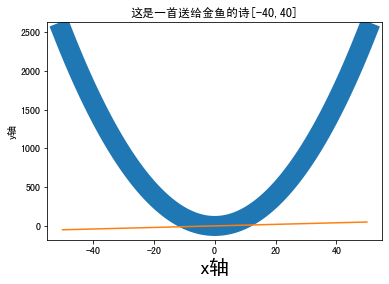

In [7]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib 
#折线图 plot
x=np.arange(-50,51) #获取x轴
y=x**2              #获取y轴
plt.title("这是一首送给金鱼的诗[-40,40]")
plt.plot(x,y,linewidth=20)#设置标题,并且设置线条宽度
#print(matplotlib.get_cachedir())
plt.xlabel("x轴",fontsize=20)#设置x轴名字同时设置x轴的字体
plt.ylabel("y轴")
plt.rcParams['font.sans-serif']=['SimHei'] #支持中文字体解决方法关注https://blog.csdn.net/sinat_40875078/article/details/104326855?spm=1001.2101.3001.6661.1&utm_medium=distribute.pc_relevant_t0.none-task-blog-2%7Edefault%7ECTRLIST%7ERate-1-104326855-blog-102835614.pc_relevant_multi_platform_whitelistv3&depth_1-utm_source=distribute.pc_relevant_t0.none-task-blog-2%7Edefault%7ECTRLIST%7ERate-1-104326855-blog-102835614.pc_relevant_multi_platform_whitelistv3&utm_relevant_index=1
#绘制多图
y2=x+1
plt.plot(x,y2)


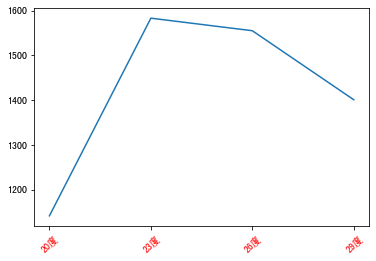

In [8]:

x=np.arange(20,30,3)
y=np.random.randint(500,2000,len(x))
x_labels=['%s度'%i for i in x]
plt.xticks(x,x_labels,rotation=45,color='red') #设置label和倾斜度,设置x轴为我们需要的东西
plt.plot(x,y)


##### 堆Heap相关<br>
* 手写小顶堆

In [9]:

class Heap:
    def __init__(self,desc=False):
        """
        初始化，默认创建一个小顶堆
        """
        self.heap = []
        self.desc = desc
    
    #@property
    def size(self):
        return len(self.heap)
    
    def top(self):
        if self.size:
            return self.heap[0]
        return None
    
    def push(self,item):
        """
        添加元素
        第一步，把元素加入到数组末尾
        第二步，把末尾元素向上调整
        """
        self.heap.append(item)
        self._sift_up(self.size()-1)
    
    def pop1(self):
        """
        弹出堆顶
        第一步，记录堆顶元素的值
        第二步，交换堆顶元素与末尾元素
        第三步，删除数组末尾元素
        第四步，新的堆顶元素向下调整
        第五步，返回答案
        """
        item = self.heap[0]
        self._swap(0,self.size()-1)
        self.heap.pop()
        self._sift_down(0)
        return item
    
    def _smaller(self,lhs,rhs):
        return lhs > rhs if self.desc else lhs < rhs
    
    def _sift_up(self,index):
        """
        向上调整
        如果父节点和当前节点满足交换的关系
        （对于小顶堆是父节点元素更大，对于大顶堆是父节点更小），
        则持续将当前节点向上调整
        """
        while index:
            parent = (index-1) // 2
            
            if self._smaller(self.heap[parent],self.heap[index]):
                break
                
            self._swap(parent,index)
            index = parent
    
    def _sift_down(self,index):
        """
        向下调整
        如果子节点和当前节点满足交换的关系
        （对于小顶堆是子节点元素更小，对于大顶堆是子节点更大），
        则持续将当前节点向下调整
        """
        # 若存在子节点
        while index*2+1 < self.size():
            smallest = index
            left = index*2+1
            right = index*2+2
            
            if self._smaller(self.heap[left],self.heap[smallest]):
                smallest = left
                
            if right < self.size and self._smaller(self.heap[right],self.heap[smallest]):
                smallest = right
                
            if smallest == index:
                break
            
            self._swap(index,smallest)
            index = smallest
    
    def _swap(self,i,j):
        self.heap[i],self.heap[j] = self.heap[j],self.heap[i]

class KthLargest:

    def __init__(self, k: int, nums):
        self.heap = Heap()
        self.k = k
        for num in nums:
            self.heap.push(num)
            if self.heap.size() > k:
                self.heap.pop1()


    def add(self, val: int) -> int:
        self.heap.push(val)
        if self.heap.size() > self.k:
            self.heap.pop1()
        return self.heap.top()
res=KthLargest(1,[1,2,3,4,5,6,7,8,9,10])
res.add(6)

#KthLargest.__init__(3,[4,5,8,2])


10

#### Python Web 框架
*   浏览器 <=> http服务器
    * 请求的是千人千面，不只是静态的url
    * 动态/静态url
    * 为了让静态请求和动态请求进行解耦，动态请求由web框架处理，然后静态请求由其余比如硬盘处理
*   前端    
    *   html页面布局
    *   css漂亮
    *   js 功能
*   wsgi
    *   网关
    *   实现了两个解耦
    *   框架负责返回一些和浏览器交互的信息，而服务器只负责工作中的一些逻辑数据，并负责其他的